In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
# load data from csv file
s_alpha = pd.read_csv('./S(a)_1_pirBN_200eV.csv')
s_energy = pd.read_csv("./Y(E).csv")

# convert data to numpy array
s_alpha_x = s_alpha['x'].to_numpy()
s_alpha_y = s_alpha['y'].to_numpy()
s_energy_x = s_energy['x'].to_numpy()
s_energy_y = s_energy['y'].to_numpy()

# Use scipy to interpolate the data
from scipy.interpolate import interp1d
s_alpha_f = interp1d(s_alpha_x, s_alpha_y, kind='nearest')
slope_e, intercept_e = np.polyfit(s_energy_x, s_energy_y, 1)
def s_energy_f(x):
    return slope_e * x + intercept_e
points_num = 50
s_alpha_xnew = np.linspace(min(s_alpha_x), max(s_alpha_x), num=points_num)
s_energy_xnew = np.linspace(min(s_energy_x), max(s_energy_x), num=points_num)

# Set the current density data. Later will be loaded from csv file with actual data.

np.random.seed(0)
n = min(len(s_alpha), len(s_energy))
x_start = 0
x_end = 100
j_x_coords = np.linspace(x_start, x_end, n)
j_y_coords = (j_x_coords**2 + np.random.normal(0, 1, n) * 25) * 0.01

j_y_f = interp1d(j_x_coords, j_y_coords, kind='quadratic')
j_x_coords_new = np.linspace(x_start, x_end, points_num)
j_y_coords_new = j_y_f(j_x_coords_new)

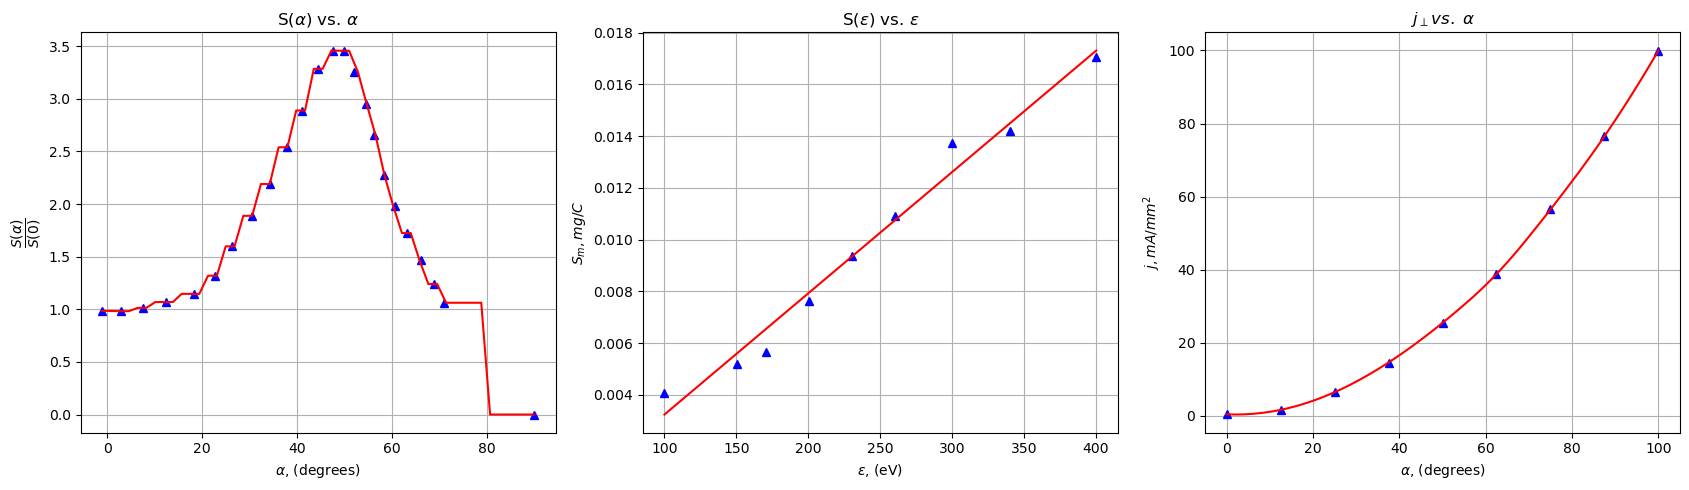

In [13]:
# Add s_alpha and s_energy to one figure. Create subplot
fig, axs = plt.subplots(1, 3, figsize=(17, 5))
axs[0].plot(s_alpha_x, s_alpha_y, marker='^', color='blue', linestyle='None', label=r'S($\alpha$)')
axs[0].plot(s_alpha_xnew, s_alpha_f(s_alpha_xnew), color='red', linestyle='-', label=r'S($\alpha$) RMS')
axs[0].set_title(r'S($\alpha$) vs. $\alpha$')
axs[0].set_xlabel(r'$\alpha$, (degrees)')
axs[0].set_ylabel(r'$\dfrac{S(\alpha)}{S(0)}$')
axs[0].grid(True)

axs[1].plot(s_energy_x, s_energy_y, marker='^', color='blue', linestyle='None', label=r'S($\alpha$)')
axs[1].plot(s_energy_xnew, s_energy_f(s_energy_xnew), color='red', linestyle='-', label=r'S($\alpha$) RMS')
axs[1].set_title(r'S($\epsilon$) vs. $\epsilon$')
axs[1].set_xlabel(r'$\epsilon$, (eV)')
axs[1].set_ylabel(r'$S_m, mg/C$')
axs[1].grid(True)

axs[2].plot(j_x_coords, j_y_coords, marker='^', color='blue', linestyle='None', label=r'Current density')
axs[2].plot(j_x_coords_new, j_y_coords_new, color='red', linestyle='-', label=r'Current density RMS')
axs[2].set_title(r'$j_{\perp} vs.\;\alpha$')
axs[2].set_xlabel(r'$\alpha$, (degrees)')
axs[2].set_ylabel(r'$j, mA/mm^2$')
axs[2].grid(True)

plt.tight_layout()

Функции для апрокс. - 

In [14]:
def alpha_f(x0, y0, x1, y1):
    """
    Function calculates the angle between vector and x axis.
    :param x0: x coordinate of the vector start point
    :param y0: y coordinate of the vector start point
    :param x1: x coordinate of the vector end point
    :param y1: y coordinate of the vector end point
    """
    dx = np.abs(x1 - x0)
    dy = np.abs(y1 - y0)
    if dx == 0:
        return 90
    else:
        return np.arctan(dy / dx) * 180 / np.pi

In [15]:
# Parameters
tau = 50  # seconds
dt = 1  # seconds
ion_src_x = 0
ion_src_y = 1
num_points = 50

profile_x = np.linspace(ion_src_x, ion_src_y, num_points)
profile_y = np.zeros(len(profile_x))

# Create an array to store the erosion profile at different time steps
num_steps = int(tau / dt)
profile_time = np.zeros((num_steps, len(profile_x)))

# Perform the erosion simulation
for step in range(num_steps):
    for i, x in enumerate(profile_x):
        alpha = alpha_f(ion_src_x, ion_src_y, x, profile_y[i])
        erosion = np.abs(s_alpha_f(alpha) * s_energy_f(200) * j_y_f(x) * dt)
        profile_y[i] -= erosion
        profile_time[step, i] = profile_y[i]

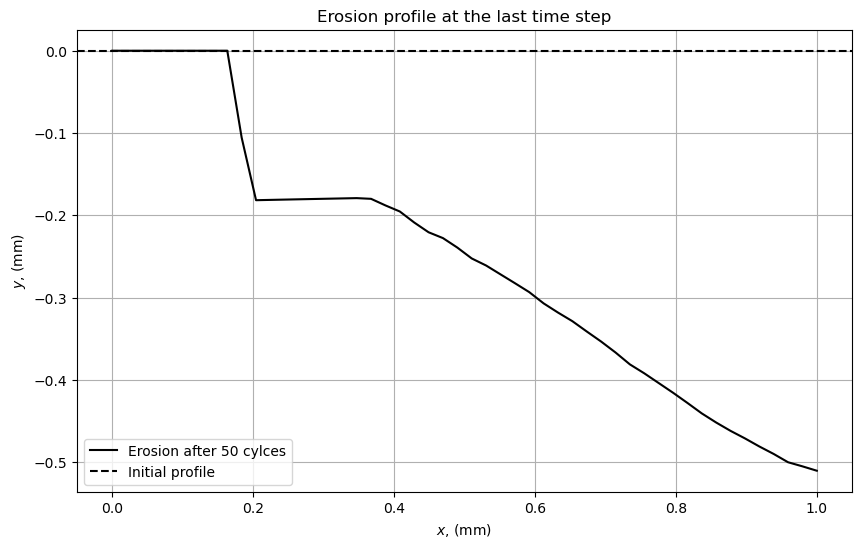

In [16]:
# Plot erosion profile at the last time step
plt.figure(figsize=(10, 6))
plt.plot(profile_x, profile_time[-1, :], color='black', linestyle='-', label=r'Erosion after {} cylces'.format(tau))
# Add initial profile
plt.axhline(y=0, color='black', linestyle='--', label='Initial profile')
plt.title(r'Erosion profile at the last time step')
plt.xlabel(r'$x$, (mm)')
plt.ylabel(r'$y$, (mm)')
plt.legend()
plt.grid(True)
plt.show()

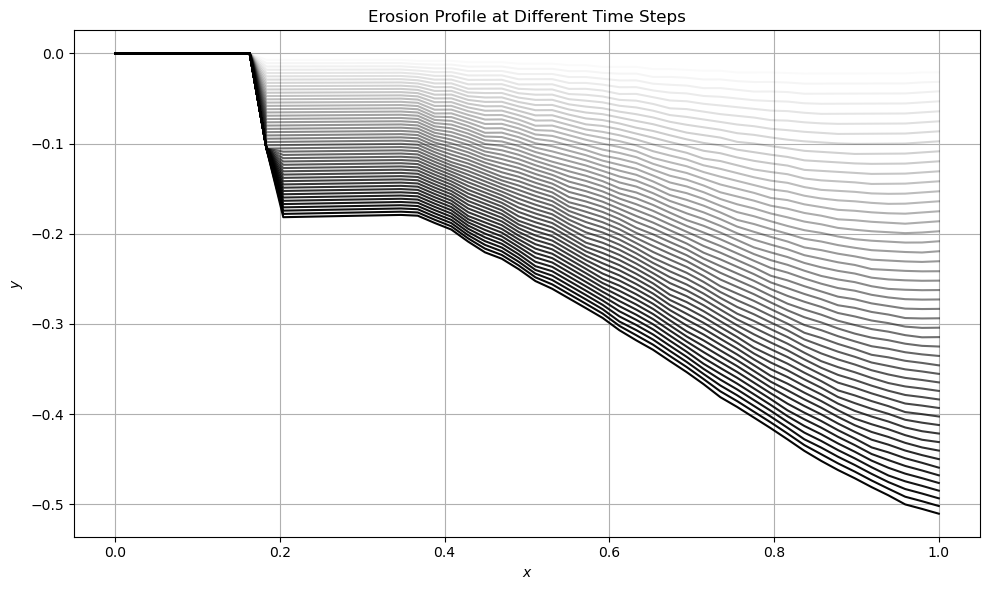

In [17]:
plt.figure(figsize=(10, 6))
for step in range(num_steps):
    alpha = step / num_steps  # Calculate alpha for transparency
    plt.plot(profile_x, profile_time[step, :], label=f'Time Step {step}', alpha=alpha, color='black')
    #plt.scatter(profile_x, profile_time[step, :], alpha=alpha, color='black', s=5)
plt.title('Erosion Profile at Different Time Steps')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.tight_layout()
plt.show()

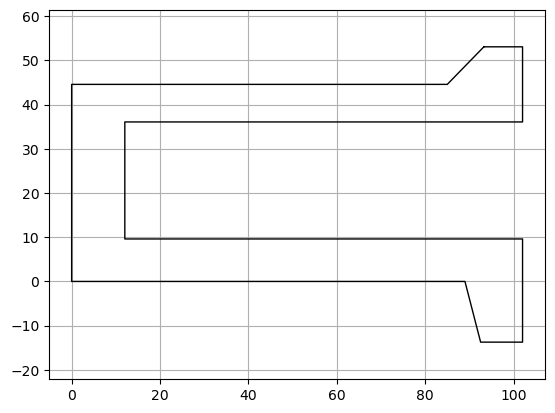

In [18]:
from contourLoader import ContourLoader as cl
import ezdxf
path = ".\ht_Contour\ceramics.dxf"
contour = cl(path)
spt_100_contour = contour.load_contour_data()
plt.plot(spt_100_contour[:,0],spt_100_contour[:,1],\
            color='black', linewidth=1, linestyle='-')
plt.grid()
plt.axis('equal')
plt.show()